# 可以被一步捕获的棋子数


**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/available-captures-for-rook/**

## 一、题目

在一个 8 x 8 的棋盘上，有一个白色的车（Rook），用字符 'R' 表示。棋盘上还可能存在空方块，白色的象（Bishop）以及黑色的卒（pawn），分别用字符 '.'，'B' 和 'p' 表示。不难看出，大写字符表示的是白棋，小写字符表示的是黑棋。

车按国际象棋中的规则移动。东，西，南，北四个基本方向任选其一，然后一直向选定的方向移动，直到满足下列四个条件之一：

- 棋手选择主动停下来。
- 棋子因到达棋盘的边缘而停下。
- 棋子移动到某一方格来捕获位于该方格上敌方（黑色）的卒，停在该方格内。
- 车不能进入/越过已经放有其他友方棋子（白色的象）的方格，停在友方棋子前。

你现在可以控制车移动一次，请你统计有多少敌方的卒处于你的捕获范围内（即，可以被一步捕获的棋子数）。

## 二、示例

### 示例 1：

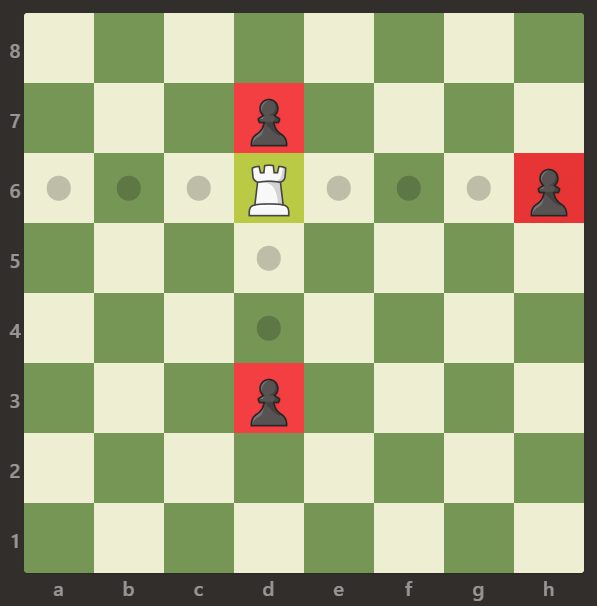

输入：

```
[
    [".",".",".",".",".",".",".","."],
    [".",".",".","p",".",".",".","."],
    [".",".",".","R",".",".",".","p"],
    [".",".",".",".",".",".",".","."],
    [".",".",".",".",".",".",".","."],
    [".",".",".","p",".",".",".","."],
    [".",".",".",".",".",".",".","."],
    [".",".",".",".",".",".",".","."]
]
```

输出：3

解释：

在本例中，车能够捕获所有的卒。

### 示例 2：

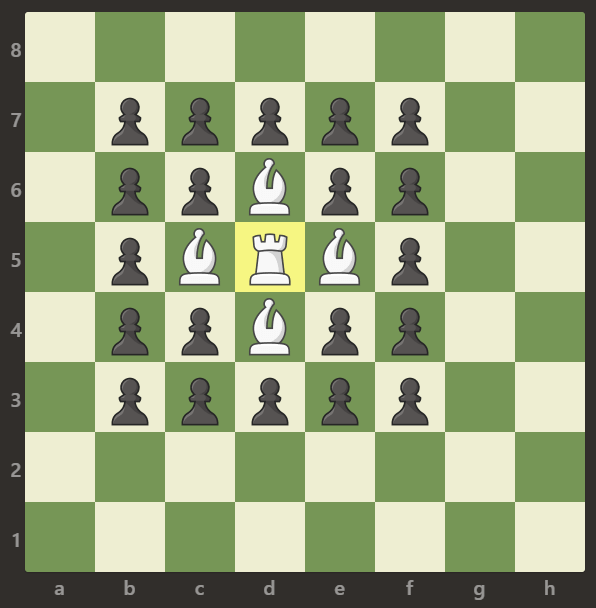

输入：
```
[
    [".",".",".",".",".",".",".","."],
    [".","p","p","p","p","p",".","."],
    [".","p","p","B","p","p",".","."],
    [".","p","B","R","B","p",".","."],
    [".","p","p","B","p","p",".","."],
    [".","p","p","p","p","p",".","."],
    [".",".",".",".",".",".",".","."],
    [".",".",".",".",".",".",".","."]
]
```
输出：0

解释：

象阻止了车捕获任何卒。

### 示例 3：

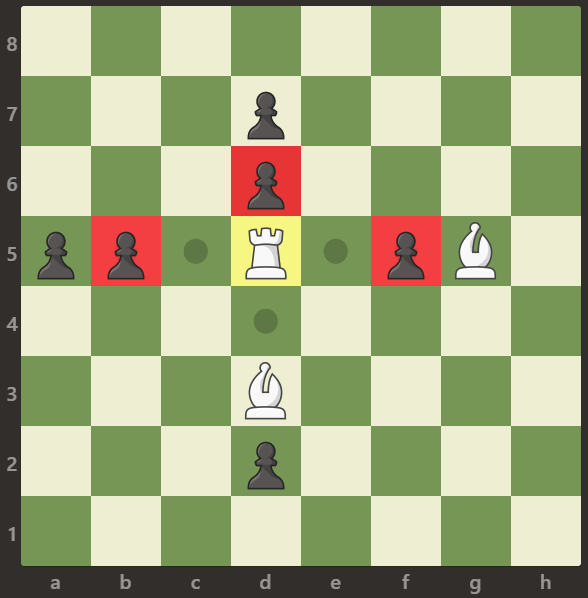

输入：

```
[
    [".",".",".",".",".",".",".","."],
    [".",".",".","p",".",".",".","."],
    [".",".",".","p",".",".",".","."],
    ["p","p",".","R",".","p","B","."],
    [".",".",".",".",".",".",".","."],
    [".",".",".","B",".",".",".","."],
    [".",".",".","p",".",".",".","."],
    [".",".",".",".",".",".",".","."]
]
```

输出：3

解释： 

车可以捕获位置 b5，d6 和 f5 的卒。

## 解题思路

### 模拟和方向向量

- 初始化4个方向的方向向量
- 找到车的位置
- 模拟向四个方向行走，遇到棋子或者边界即停止行走，如果棋子是黑色的卒，则结果+1

In [1]:
def numRookCaptures(board):
    dx = [1,-1,0,0]
    dy = [0,0,1,-1]
    rook = [-1, -1]
    res = 0
    for x in range(8):
        if rook[0] != -1:
            break
        for y in range(8):
            if board[x][y] == 'R':
                rook = [x, y]
                break
    for i in range(1, 9):
        for o in range(4):
            new_x = i * dx[o] + rook[0]
            new_y = i * dy[o] + rook[1]
            # 超出棋盘
            if new_x < 0 or new_y < 0 or new_x >= 8 or new_y >= 8:
                dx[o] = 0
                dy[o] = 0
                continue
            point = board[new_x][new_y]
            if point != '.':
                if point == 'p':
                    res += 1
                dx[o] = 0
                dy[o] = 0
    return res

In [2]:
numRookCaptures([
    [".",".",".",".",".",".",".","."],
    [".",".",".","p",".",".",".","."],
    [".",".",".","R",".",".",".","p"],
    [".",".",".",".",".",".",".","."],
    [".",".",".",".",".",".",".","."],
    [".",".",".","p",".",".",".","."],
    [".",".",".",".",".",".",".","."],
    [".",".",".",".",".",".",".","."]
])

3

In [3]:
numRookCaptures([
    [".",".",".",".",".",".",".","."],
    [".","p","p","p","p","p",".","."],
    [".","p","p","B","p","p",".","."],
    [".","p","B","R","B","p",".","."],
    [".","p","p","B","p","p",".","."],
    [".","p","p","p","p","p",".","."],
    [".",".",".",".",".",".",".","."],
    [".",".",".",".",".",".",".","."]
])

0

In [4]:
numRookCaptures([
    [".",".",".",".",".",".",".","."],
    [".",".",".","p",".",".",".","."],
    [".",".",".","p",".",".",".","."],
    ["p","p",".","R",".","p","B","."],
    [".",".",".",".",".",".",".","."],
    [".",".",".","B",".",".",".","."],
    [".",".",".","p",".",".",".","."],
    [".",".",".",".",".",".",".","."]
])

3